In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv


In [110]:
train_logs = pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv")
train_logs


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


In [111]:
train_logs['activity'] = np.where((train_logs['activity'] == 'Remove/Cut') | (train_logs['activity'] =='Nonproduction')| (train_logs['activity'] =='Input') , train_logs['activity'] , 'Input')
train_logs['activity'].value_counts()

activity
Input            6731889
Remove/Cut        970158
Nonproduction     703851
Name: count, dtype: int64

In [112]:
'''for i in train_logs['activity'].unique():
    d = train_logs[train_logs['activity'] == i][['text_change','up_event']]
    print(i)
    print(d['up_event'].unique())
    print(d['text_change'].unique())
    print('.........................................................................................................')
    '''

"for i in train_logs['activity'].unique():\n    d = train_logs[train_logs['activity'] == i][['text_change','up_event']]\n    print(i)\n    print(d['up_event'].unique())\n    print(d['text_change'].unique())\n    print('.........................................................................................................')\n    "

In [113]:
print(train_logs['activity'].unique())
print(train_logs['activity'].value_counts())

['Nonproduction' 'Input' 'Remove/Cut']
activity
Input            6731889
Remove/Cut        970158
Nonproduction     703851
Name: count, dtype: int64


In [114]:
print(train_logs['down_event'].unique())
train_logs['down_event'].value_counts()


['Leftclick' 'Shift' 'q' 'Space' 'Backspace' '.' ',' 'Enter' 'ArrowLeft'
 "'" ';' 'ArrowRight' '-' '?' 'Tab' '"' 'ArrowUp' 'ArrowDown' 'Rightclick'
 '=' 'CapsLock' 'Control' 'c' 'v' '/' 'Delete' ':' 'z' '[' '$' '(' ')' '+'
 'Home' 'End' '\\' 'Meta' '*' '&' 'AudioVolumeMute' 'x' '!' 'Insert'
 'MediaPlayPause' 'NumLock' '%' 'V' '>' 'Alt' 'AudioVolumeUp'
 'ContextMenu' 'AudioVolumeDown' 'a' '<' 'PageDown' ']' 'Middleclick' '@'
 'F12' 'j' '\x96' 'Dead' 't' 's' 'n' 'y' '{' 'ScrollLock' '¿' 'Process'
 '}' 'MediaTrackPrevious' 'MediaTrackNext' 'F3' '^' 'Unidentified'
 'Cancel' '2' 'i' 'd' 'r' 'e' '`' '\x9b' 'm' '#' '~' 'PageUp' 'T' 'A' 'b'
 'S' 'ModeChange' '_' 'Escape' 'F11' 'Unknownclick' 'AltGraph' 'F10' 'h'
 'F15' 'Clear' 'OS' 'F' 'C' 'o' 'Ä±' 'f' 'u' 'w' 'p' 'g' 'M' 'l' '|'
 'â\x80\x93' 'I' '0' '1' '5' '\x97' 'Ë\x86' '¡' '\x80' 'Â´' 'Å\x9f' 'F2'
 'ä' 'F1' 'Pause' 'F6']


down_event
q             5365319
Space         1207128
Backspace      964089
Shift          334227
ArrowRight     121338
               ...   
F10                 1
Cancel              1
S                   1
T                   1
F6                  1
Name: count, Length: 131, dtype: int64

In [115]:
print(train_logs['up_event'].unique())
train_logs['up_event'].value_counts()


['Leftclick' 'Shift' 'q' 'Space' 'Backspace' '.' ',' 'Enter' 'ArrowLeft'
 "'" ';' 'ArrowRight' '-' '?' 'Tab' '"' 'ArrowUp' 'ArrowDown' 'm'
 'Rightclick' 'i' 'o' 't' '=' 'a' 'CapsLock' 'Control' 'c' 'v' '/'
 'Delete' ':' 'z' '[' '$' '(' ')' '+' 'Home' 'End' '\\' 'Meta' '*' '&'
 'AudioVolumeMute' 'x' '!' 'Insert' 'MediaPlayPause' 'w' 'NumLock' '%' 'V'
 'b' '>' 'Alt' 'AudioVolumeUp' 'ContextMenu' 'AudioVolumeDown' 'n' 'e' '<'
 'PageDown' ']' 'Middleclick' '@' 'F12' 'u' 'j' 's' '\x96' 'Dead' 'y' '{'
 'ScrollLock' '¿' 'p' 'Process' '}' 'MediaTrackPrevious' 'MediaTrackNext'
 'F3' '^' 'Unidentified' 'Cancel' 'h' '2' 'd' 'r' '`' '\x9b' 'f' 'g' '#'
 '~' 'PageUp' 'l' 'T' 'A' 'S' 'ModeChange' '_' 'Escape' 'F11'
 'Unknownclick' 'AltGraph' 'F10' 'F15' 'Clear' 'OS' 'C' 'Ä±' 'M' '|'
 'â\x80\x93' '0' '1' '5' '\x97' 'Ë\x86' '¡' '\x80' 'Â´' 'Å\x9f' 'F2' 'ä'
 'F1' 'k' 'Pause' 'F6']


up_event
q             5364789
Space         1207128
Backspace      964089
Shift          334227
ArrowRight     121338
               ...   
Cancel              1
T                   1
S                   1
M                   1
F6                  1
Name: count, Length: 130, dtype: int64

In [116]:
test_logs = pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv")
test_logs


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0
5,4444cccc,2,184996,185052,56,Input,q,q,q,1,1


In [117]:
test_logs['activity'] = np.where((test_logs['activity'] == 'Remove/Cut') | (test_logs['activity'] =='Nonproduction')| (test_logs['activity'] =='Input') , test_logs['activity'] , 'Input')
test_logs['activity'].value_counts()

activity
Input    6
Name: count, dtype: int64

In [118]:
from tqdm import tqdm

In [119]:
'''
grouped = train_logs.groupby('id')
train = pd.DataFrame()
for group_name, group_df in tqdm(grouped):
    #print(f"Group: {group_name}")
    
    #production rate
    counts = group_df['activity'].value_counts()
    counts = counts[0]-counts[1]
    total_characters_process = group_df['text_change'].str.len().sum()
    total_time_taken_process_minutes = (group_df['up_time'].iloc[-1] - group_df['down_time'].iloc[0]) / (1000*60)
    production_rate_process = total_characters_process / total_time_taken_process_minutes
    train.loc[group_name,'production_rate_process '] = production_rate_process 
    production_rate_product = counts / total_time_taken_process_minutes
    train.loc[group_name,'production_rate_product'] = production_rate_product
    production_rate_word_count = group_df['word_count'].iloc[-1] / total_time_taken_process_minutes
    train.loc[group_name,'production_rate_word_count'] = production_rate_word_count
    
    
    #pause length
    threshold = 2000
    group_df['IKI'] = group_df['down_time'].diff()
    num_of_pauses = (group_df['IKI']>threshold).sum()
    total_pause_time = group_df[group_df['IKI']>2000]['IKI'].sum()/(1000*60)
    proportion_of_pause_time = (total_pause_time/total_time_taken_process_minutes)*100
    mean_pause_duration = group_df['IKI'][group_df['IKI'] > threshold].mean()
    train.loc[group_name,'total_pause_time'] = total_pause_time
    train.loc[group_name,'proportion_of_pause_time'] = proportion_of_pause_time
    train.loc[group_name,'mean_pause_duration'] = mean_pause_duration
    
    #Revision
    mask = ((group_df['activity'] == 'Remove/Cut') | (group_df['activity'] == 'Replace')).astype(int)
    groups = (mask != mask.shift()).cumsum()
    num_sequential_deletions = mask.groupby(groups).sum()
    num_sequential_deletions = (num_sequential_deletions>0).sum()
    
    mask = ((group_df['activity'] == 'Input') | (group_df['activity'] == 'Replace')).astype(int)
    groups = (mask != mask.shift()).cumsum()
    num_sequential_insertions = mask.groupby(groups).sum()
    num_sequential_insertions = (num_sequential_insertions>0).sum()
    
    deletions = group_df[group_df['activity'] == 'Remove/Cut']
    insertions = group_df[group_df['activity'] == 'Input']
    total_chars_deletions = deletions['text_change'].str.len().sum()
    total_chars_insertions = insertions['text_change'].str.len().sum()

# Calculate proportion of deletions and insertions (as % of total writing time)
    prop_deletions = (total_chars_deletions / total_time_taken_process_minutes) * 100
    prop_insertions = (total_chars_insertions / total_time_taken_process_minutes) * 100

# Calculate product vs. process ratio
    product_vs_process_ratio = total_chars_insertions / (total_chars_insertions + total_chars_deletions)

# Calculate number/length of revisions at the point of inscription and after transcription
    inscriptions = group_df[group_df['activity'] == 'Input']
    revisions_at_inscription = inscriptions[inscriptions.duplicated(subset='down_time', keep='last')]
    revisions_after_transcription = revisions_at_inscription[revisions_at_inscription['down_time'] != revisions_at_inscription['down_time'].shift()]

# Calculate number of immediate revisions and distant revisions
    cursor_positions = group_df['cursor_position'].astype(str)
    immediate_revisions = revisions_at_inscription[cursor_positions == cursor_positions.shift()]
    distant_revisions = revisions_at_inscription[cursor_positions != cursor_positions.shift()]
    
    train.loc[group_name,'num_sequential_deletions'] = num_sequential_deletions
    train.loc[group_name,'num_sequential_insertions'] = num_sequential_insertions
    train.loc[group_name,'total_chars_insertions'] = total_chars_insertions
    train.loc[group_name,'total_chars_deletions'] = total_chars_deletions
    train.loc[group_name,'prop_deletions'] = prop_deletions
    train.loc[group_name,'prop_insertions'] = prop_insertions
    train.loc[group_name,'product_vs_process_ratio'] = product_vs_process_ratio
    train.loc[group_name,'revisions_at_inscription'] = len(revisions_at_inscription)
    train.loc[group_name,'revisions_after_transcription'] = len(revisions_after_transcription)
    train.loc[group_name,'immediate_revisions'] = len(immediate_revisions)
    train.loc[group_name,'distant_revisions'] = len(distant_revisions)
    
    #Bursts
    pauses = (group_df['IKI'] > threshold).astype(int)
    revisions = ((group_df['activity'] == 'Remove/Cut') | (group_df['activity'] == 'Input')).astype(int)

# Identify P-bursts and R-bursts based on pauses and revisions
    p_bursts = ((pauses == 1) & (revisions == 0)).astype(int)
    r_bursts = ((pauses == 1) | (revisions == 1)).astype(int)

# Calculate number of P-bursts and R-bursts
    num_p_bursts = p_bursts.sum()
    num_r_bursts = r_bursts.sum()


# Calculate proportion of P-bursts and R-bursts (as % of total writing time)
    prop_p_bursts = (num_p_bursts / total_time_taken_process_minutes) * 100
    prop_r_bursts = (num_r_bursts / total_time_taken_process_minutes) * 100

# Calculate lengths of P-bursts and R-bursts (in characters)
    p_burst_lengths = group_df.loc[p_bursts.diff().ne(0) & p_bursts == 1, 'text_change'].apply(len)
    r_burst_lengths = group_df.loc[r_bursts.diff().ne(0) & r_bursts == 1, 'text_change'].apply(len)
    
    
    train.loc[group_name,'num_p_bursts'] = num_p_bursts
    train.loc[group_name,'num_r_bursts'] = num_r_bursts
    train.loc[group_name,'prop_p_bursts'] = prop_p_bursts
    train.loc[group_name,'prop_r_bursts'] = prop_r_bursts
    train.loc[group_name,'prop_p_bursts'] = p_burst_lengths.sum() if not p_burst_lengths.empty else 0
    train.loc[group_name,'prop_r_bursts'] = r_burst_lengths.sum() if not r_burst_lengths.empty else 0

    #Process variance
# Calculate total writing time (in milliseconds)
    total_time_ms = group_df['up_time'].iloc[-1] - group_df['down_time'].iloc[0]
# Set the number of time intervals (e.g., 5 or 10)
    num_intervals = 10
# Calculate interval duration in milliseconds
    interval_duration = total_time_ms / num_intervals

# Create intervals and assign each keystroke to an interval
    group_df['Interval'] = (group_df['down_time'] - group_df['down_time'].iloc[0]) // interval_duration

# Group by interval and count characters produced in each interval
    characters_per_interval = group_df.groupby('Interval')['text_change'].apply(lambda x: len("".join(x)))

# Calculate characters per minute for each interval
    characters_per_minute_per_interval = (characters_per_interval / (interval_duration / (1000 * 60))).fillna(0)

# Calculate standard deviation of characters produced per interval
    process_variance = characters_per_minute_per_interval.std()

    train.loc[group_name,'process_variance'] = process_variance

    
    
    
    

train
'''

'\ngrouped = train_logs.groupby(\'id\')\ntrain = pd.DataFrame()\nfor group_name, group_df in tqdm(grouped):\n    #print(f"Group: {group_name}")\n    \n    #production rate\n    counts = group_df[\'activity\'].value_counts()\n    counts = counts[0]-counts[1]\n    total_characters_process = group_df[\'text_change\'].str.len().sum()\n    total_time_taken_process_minutes = (group_df[\'up_time\'].iloc[-1] - group_df[\'down_time\'].iloc[0]) / (1000*60)\n    production_rate_process = total_characters_process / total_time_taken_process_minutes\n    train.loc[group_name,\'production_rate_process \'] = production_rate_process \n    production_rate_product = counts / total_time_taken_process_minutes\n    train.loc[group_name,\'production_rate_product\'] = production_rate_product\n    production_rate_word_count = group_df[\'word_count\'].iloc[-1] / total_time_taken_process_minutes\n    train.loc[group_name,\'production_rate_word_count\'] = production_rate_word_count\n    \n    \n    #pause length\

In [120]:
grouped = train_logs.groupby('id')
train = pd.DataFrame()
for group_name, group_df in tqdm(grouped):
    #print(f"Group: {group_name}")

    #production rate
    counts = group_df['activity'].value_counts()
    counts = counts[0]-counts[1]
    total_characters_process = group_df[group_df['activity'] == 'Input']['text_change'].str.len().sum()
    total_time_taken_process_minutes = (group_df['up_time'].iloc[-1] - group_df['down_time'].iloc[0]) / (1000*60)
    production_rate_process = total_characters_process / total_time_taken_process_minutes
    train.loc[group_name,'production_rate_process '] = production_rate_process 
    production_rate_product = counts / total_time_taken_process_minutes
    train.loc[group_name,'production_rate_product'] = production_rate_product
    production_rate_word_count = group_df['word_count'].iloc[-1] / total_time_taken_process_minutes
    train.loc[group_name,'production_rate_word_count'] = production_rate_word_count
    
    
    #pause length
    threshold = 2000
    group_df['IKI'] = group_df['down_time'].diff()
    num_of_pauses = (group_df['IKI']>threshold).sum()
    total_pause_time = group_df[group_df['IKI']>2000]['IKI'].sum()/(1000*60)
    proportion_of_pause_time = (total_pause_time/total_time_taken_process_minutes)*100
    mean_pause_duration = group_df['IKI'][group_df['IKI'] > threshold].mean()
    train.loc[group_name,'total_pause_time'] = total_pause_time
    train.loc[group_name,'proportion_of_pause_time'] = proportion_of_pause_time
    train.loc[group_name,'mean_pause_duration'] = mean_pause_duration
    
    #Revision
    mask = (group_df['activity'] == 'Remove/Cut').astype(int)
    groups = (mask != mask.shift()).cumsum()
    num_sequential_deletions = mask.groupby(groups).sum()
    num_sequential_deletions = (num_sequential_deletions>0).sum()
    
    mask = (group_df['activity'] == 'Input').astype(int)
    groups = (mask != mask.shift()).cumsum()
    num_sequential_insertions = mask.groupby(groups).sum()
    num_sequential_insertions = (num_sequential_insertions>0).sum()
    
    deletions = group_df[group_df['activity'] == 'Remove/Cut']
    insertions = group_df[group_df['activity'] == 'Input']
    total_chars_deletions = deletions['text_change'].str.len().sum()
    total_chars_insertions = insertions['text_change'].str.len().sum()

# Calculate proportion of deletions and insertions (as % of total writing time)
    prop_deletions = (total_chars_deletions / total_time_taken_process_minutes) * 100
    prop_insertions = (total_chars_insertions / total_time_taken_process_minutes) * 100

# Calculate product vs. process ratio
    product_vs_process_ratio = total_chars_insertions / (total_chars_insertions + total_chars_deletions)

# Calculate number/length of revisions at the point of inscription and after transcription
    inscriptions = group_df[group_df['activity'] == 'Input']
    revisions_at_inscription = inscriptions[inscriptions.duplicated(subset='down_time', keep='last')]
    revisions_after_transcription = revisions_at_inscription[revisions_at_inscription['down_time'] != revisions_at_inscription['down_time'].shift()]

# Calculate number of immediate revisions and distant revisions
    cursor_positions = group_df['cursor_position'].astype(str)
    immediate_revisions = revisions_at_inscription[cursor_positions == cursor_positions.shift()]
    distant_revisions = revisions_at_inscription[cursor_positions != cursor_positions.shift()]
    
    train.loc[group_name,'num_sequential_deletions'] = num_sequential_deletions
    train.loc[group_name,'num_sequential_insertions'] = num_sequential_insertions
    train.loc[group_name,'total_chars_insertions'] = total_chars_insertions
    train.loc[group_name,'total_chars_deletions'] = total_chars_deletions
    train.loc[group_name,'prop_deletions'] = prop_deletions
    train.loc[group_name,'prop_insertions'] = prop_insertions
    train.loc[group_name,'product_vs_process_ratio'] = product_vs_process_ratio
    train.loc[group_name,'revisions_at_inscription'] = len(revisions_at_inscription)
    train.loc[group_name,'revisions_after_transcription'] = len(revisions_after_transcription)
    train.loc[group_name,'immediate_revisions'] = len(immediate_revisions)
    train.loc[group_name,'distant_revisions'] = len(distant_revisions)
    
    #Bursts
    pauses = (group_df['IKI'] > threshold).astype(int)
    revisions = ((group_df['activity'] == 'Remove/Cut') | (group_df['activity'] == 'Input')).astype(int)

# Identify P-bursts and R-bursts based on pauses and revisions
    p_bursts = ((pauses == 1) & (revisions == 0)).astype(int)
    r_bursts = ((pauses == 1) | (revisions == 1)).astype(int)

# Calculate number of P-bursts and R-bursts
    num_p_bursts = p_bursts.sum()
    num_r_bursts = r_bursts.sum()


# Calculate proportion of P-bursts and R-bursts (as % of total writing time)
    prop_p_bursts = (num_p_bursts / total_time_taken_process_minutes) * 100
    prop_r_bursts = (num_r_bursts / total_time_taken_process_minutes) * 100

# Calculate lengths of P-bursts and R-bursts (in characters)
    p_burst_lengths = group_df.loc[p_bursts.diff().ne(0) & p_bursts == 1, 'text_change'].apply(len)
    r_burst_lengths = group_df.loc[r_bursts.diff().ne(0) & r_bursts == 1, 'text_change'].apply(len)
    
    
    train.loc[group_name,'num_p_bursts'] = num_p_bursts
    train.loc[group_name,'num_r_bursts'] = num_r_bursts
    train.loc[group_name,'prop_p_bursts'] = prop_p_bursts
    train.loc[group_name,'prop_r_bursts'] = prop_r_bursts
    train.loc[group_name,'prop_p_bursts'] = p_burst_lengths.sum() if not p_burst_lengths.empty else 0
    train.loc[group_name,'prop_r_bursts'] = r_burst_lengths.sum() if not r_burst_lengths.empty else 0

    #Process variance
# Calculate total writing time (in milliseconds)
    total_time_ms = group_df['up_time'].iloc[-1] - group_df['down_time'].iloc[0]
# Set the number of time intervals (e.g., 5 or 10)
    num_intervals = 10
# Calculate interval duration in milliseconds
    interval_duration = total_time_ms / num_intervals

# Create intervals and assign each keystroke to an interval
    group_df['Interval'] = (group_df['down_time'] - group_df['down_time'].iloc[0]) // interval_duration

# Group by interval and count characters produced in each interval
    characters_per_interval = group_df.groupby('Interval')['text_change'].apply(lambda x: len("".join(x)))

# Calculate characters per minute for each interval
    characters_per_minute_per_interval = (characters_per_interval / (interval_duration / (1000 * 60))).fillna(0)

# Calculate standard deviation of characters produced per interval
    process_variance = characters_per_minute_per_interval.std()

    train.loc[group_name,'process_variance'] = process_variance

    
    
    
    

train

100%|██████████| 2471/2471 [01:56<00:00, 21.20it/s]


,production_rate_process,production_rate_product,production_rate_word_count,total_pause_time,proportion_of_pause_time,mean_pause_duration,num_sequential_deletions,num_sequential_insertions,total_chars_insertions,total_chars_deletions,...,product_vs_process_ratio,revisions_at_inscription,revisions_after_transcription,immediate_revisions,distant_revisions,num_p_bursts,num_r_bursts,prop_p_bursts,prop_r_bursts,process_variance
001519c8,71.034241,53.509346,8.512092,20.384133,68.043771,9059.614815,96.0,127.0,2128.0,417.0,...,0.836149,0.0,0.0,0.0,0.0,53.0,2490.0,336.0,163.0,31.292663
0022f953,66.573928,57.326601,10.919353,19.905383,67.923094,14050.858824,82.0,122.0,1951.0,260.0,...,0.882406,0.0,0.0,0.0,0.0,50.0,2250.0,328.0,135.0,98.859976
0042269b,130.815039,104.672402,13.716397,18.994450,64.488962,13567.464286,97.0,149.0,3853.0,632.0,...,0.859086,0.0,0.0,0.0,0.0,53.0,4014.0,328.0,647.0,77.601264
0059420b,58.676198,50.840967,9.067740,13.226567,58.220904,8533.268817,66.0,82.0,1333.0,151.0,...,0.898248,0.0,0.0,0.0,0.0,13.0,1470.0,96.0,76.0,45.006848
0075873a,73.560513,53.977205,9.545442,17.758617,67.267402,11581.706522,58.0,83.0,1942.0,517.0,...,0.789752,0.0,0.0,0.0,0.0,37.0,2496.0,280.0,29.0,41.398400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb8c745,155.732988,89.193763,9.258516,16.405883,55.638877,21398.978261,84.0,131.0,4592.0,962.0,...,0.826792,0.0,0.0,0.0,0.0,15.0,4565.0,104.0,77.0,138.169690
ffbef7e5,81.049058,75.884333,14.785293,16.377333,55.283942,10680.869565,12.0,69.0,2401.0,60.0,...,0.975620,0.0,0.0,0.0,0.0,40.0,2496.0,224.0,70.0,63.143374
ffccd6fd,88.300882,84.395683,6.229722,19.261267,59.697678,12699.736264,42.0,57.0,2849.0,88.0,...,0.970037,22.0,21.0,0.0,22.0,19.0,2956.0,136.0,58.0,104.927626
ffec5b38,116.685330,105.560926,16.646301,12.637800,50.937681,10832.400000,92.0,131.0,2895.0,343.0,...,0.894070,0.0,0.0,0.0,0.0,24.0,3195.0,192.0,48.0,82.058431


In [121]:
train_scores = pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv",index_col = 'id')
print(train_scores)
train = pd.concat([train,train_scores],axis=1)
train

          score
id             
001519c8    3.5
0022f953    3.5
0042269b    6.0
0059420b    2.0
0075873a    4.0
...         ...
ffb8c745    3.5
ffbef7e5    4.0
ffccd6fd    1.5
ffec5b38    5.0
fff05981    4.0

[2471 rows x 1 columns]


,production_rate_process,production_rate_product,production_rate_word_count,total_pause_time,proportion_of_pause_time,mean_pause_duration,num_sequential_deletions,num_sequential_insertions,total_chars_insertions,total_chars_deletions,...,revisions_at_inscription,revisions_after_transcription,immediate_revisions,distant_revisions,num_p_bursts,num_r_bursts,prop_p_bursts,prop_r_bursts,process_variance,score
001519c8,71.034241,53.509346,8.512092,20.384133,68.043771,9059.614815,96.0,127.0,2128.0,417.0,...,0.0,0.0,0.0,0.0,53.0,2490.0,336.0,163.0,31.292663,3.5
0022f953,66.573928,57.326601,10.919353,19.905383,67.923094,14050.858824,82.0,122.0,1951.0,260.0,...,0.0,0.0,0.0,0.0,50.0,2250.0,328.0,135.0,98.859976,3.5
0042269b,130.815039,104.672402,13.716397,18.994450,64.488962,13567.464286,97.0,149.0,3853.0,632.0,...,0.0,0.0,0.0,0.0,53.0,4014.0,328.0,647.0,77.601264,6.0
0059420b,58.676198,50.840967,9.067740,13.226567,58.220904,8533.268817,66.0,82.0,1333.0,151.0,...,0.0,0.0,0.0,0.0,13.0,1470.0,96.0,76.0,45.006848,2.0
0075873a,73.560513,53.977205,9.545442,17.758617,67.267402,11581.706522,58.0,83.0,1942.0,517.0,...,0.0,0.0,0.0,0.0,37.0,2496.0,280.0,29.0,41.398400,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb8c745,155.732988,89.193763,9.258516,16.405883,55.638877,21398.978261,84.0,131.0,4592.0,962.0,...,0.0,0.0,0.0,0.0,15.0,4565.0,104.0,77.0,138.169690,3.5
ffbef7e5,81.049058,75.884333,14.785293,16.377333,55.283942,10680.869565,12.0,69.0,2401.0,60.0,...,0.0,0.0,0.0,0.0,40.0,2496.0,224.0,70.0,63.143374,4.0
ffccd6fd,88.300882,84.395683,6.229722,19.261267,59.697678,12699.736264,42.0,57.0,2849.0,88.0,...,22.0,21.0,0.0,22.0,19.0,2956.0,136.0,58.0,104.927626,1.5
ffec5b38,116.685330,105.560926,16.646301,12.637800,50.937681,10832.400000,92.0,131.0,2895.0,343.0,...,0.0,0.0,0.0,0.0,24.0,3195.0,192.0,48.0,82.058431,5.0


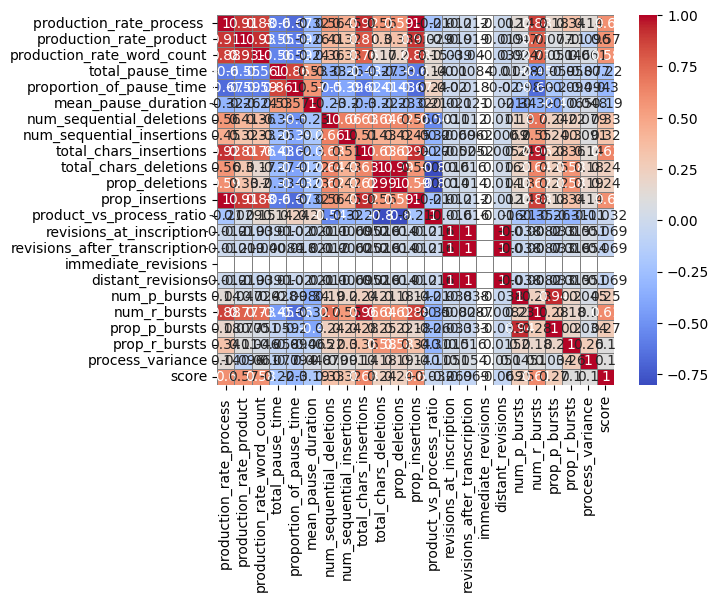

In [122]:

import matplotlib.pyplot as plt
import seaborn as sns
sns_plot = sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidths=0.5, linecolor='gray')
plt.show()

In [123]:
train.describe()

,production_rate_process,production_rate_product,production_rate_word_count,total_pause_time,proportion_of_pause_time,mean_pause_duration,num_sequential_deletions,num_sequential_insertions,total_chars_insertions,total_chars_deletions,...,revisions_at_inscription,revisions_after_transcription,immediate_revisions,distant_revisions,num_p_bursts,num_r_bursts,prop_p_bursts,prop_r_bursts,process_variance,score
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,...,2471.000000,2471.000000,2471.0,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,98.393814,79.121089,13.621165,16.505138,57.040713,13690.163133,95.414812,138.811817,2802.177256,477.250911,...,0.061109,0.059490,0.0,0.061109,33.496155,3150.471874,218.411979,174.794415,131.826836,3.711251
std,44.147363,37.798260,6.196601,4.983250,13.494197,11876.157615,65.601711,109.829027,1268.715266,497.428791,...,0.616826,0.589467,0.0,0.616826,17.330459,1426.321789,110.467759,459.607366,175.950072,1.024937
min,8.592205,0.281492,1.307509,0.870583,7.207684,3003.452381,0.000000,12.000000,230.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,257.000000,8.000000,1.000000,10.950701,0.500000
25%,64.121336,51.096851,8.848600,13.500608,47.859856,7777.691154,52.000000,83.000000,1813.000000,179.000000,...,0.000000,0.000000,0.0,0.000000,21.000000,2031.500000,136.000000,47.000000,55.997274,3.000000
50%,89.831693,71.773027,12.215452,16.656200,58.157321,10499.015625,81.000000,121.000000,2536.000000,342.000000,...,0.000000,0.000000,0.0,0.000000,32.000000,2861.000000,208.000000,81.000000,87.873553,4.000000
75%,122.804023,99.281042,16.787440,19.337767,66.426122,15120.998237,122.000000,171.000000,3500.000000,612.500000,...,0.000000,0.000000,0.0,0.000000,44.000000,3990.500000,288.000000,153.500000,135.444004,4.500000
max,333.946534,298.329661,53.107358,66.188883,96.828294,242778.777778,915.000000,3482.000000,10025.000000,7775.000000,...,22.000000,21.000000,0.0,22.000000,135.000000,12497.000000,856.000000,10238.000000,2386.942204,6.000000


In [124]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df = train
SEED = 42
TARGET = 'score'
FEATURES = df.columns.drop(TARGET)

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(NUMERICAL)
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(CATEGORICAL)
print(f"Categorical features: {', '.join(CATEGORICAL)}")
X=df.drop(columns=TARGET)
y=df[TARGET]

Index(['production_rate_process ', 'production_rate_product',
       'production_rate_word_count', 'total_pause_time',
       'proportion_of_pause_time', 'mean_pause_duration',
       'num_sequential_deletions', 'num_sequential_insertions',
       'total_chars_insertions', 'total_chars_deletions', 'prop_deletions',
       'prop_insertions', 'product_vs_process_ratio',
       'revisions_at_inscription', 'revisions_after_transcription',
       'immediate_revisions', 'distant_revisions', 'num_p_bursts',
       'num_r_bursts', 'prop_p_bursts', 'prop_r_bursts', 'process_variance'],
      dtype='object')
Numerical features: production_rate_process , production_rate_product, production_rate_word_count, total_pause_time, proportion_of_pause_time, mean_pause_duration, num_sequential_deletions, num_sequential_insertions, total_chars_insertions, total_chars_deletions, prop_deletions, prop_insertions, product_vs_process_ratio, revisions_at_inscription, revisions_after_transcription, immediate_revi

In [125]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [126]:
model1 = RandomForestRegressor()
model2 = LGBMRegressor()
model3 = XGBRegressor()
model4 = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
model5 = AdaBoostRegressor()
model6 = GradientBoostingRegressor()
model7 = SVR()
model8 = KNeighborsRegressor()

In [127]:
numerical_pipe = Pipeline([
    ('imputer',IterativeImputer()),
    ('imputer1', SimpleImputer(strategy='mean',fill_value=np.NaN)),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([

    ('imputer1', SimpleImputer(strategy='most_frequent', fill_value=np.NaN)),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe1 = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LinearRegression())
])

pipe1.fit(X_train, y_train)
y_pred=pipe1.predict(X_test)
r2_score(y_test,y_pred)

0.5622470250954573

In [128]:
'''from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm
regressor = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
scores=[]
for i in tqdm(range(1000)):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe2 = Pipeline([
    ('preprocessors', preprocessors),
    ('model', regressor)
    ])
    pipe2.fit(X_train,y_train)
    y_pred=pipe2.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
pipe2= Pipeline([
    ('preprocessors', preprocessors),
    ('model', regressor)
])
pipe2.fit(X_train,y_train)
y_pred=pipe2.predict(X_test)
r2_score(y_test,y_pred)
'''

"from sklearn.ensemble import ExtraTreesRegressor\nfrom tqdm import tqdm\nregressor = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',\n                    max_depth=None, max_features='auto', max_leaf_nodes=None,\n                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,\n                    min_samples_split=2, min_weight_fraction_leaf=0.0,\n                    n_estimators=100, n_jobs=-1, oob_score=False,\n                    random_state=123, verbose=0, warm_start=False)\nscores=[]\nfor i in tqdm(range(1000)):\n    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)\n    lr=LinearRegression()\n    pipe2 = Pipeline([\n    ('preprocessors', preprocessors),\n    ('model', regressor)\n    ])\n    pipe2.fit(X_train,y_train)\n    y_pred=pipe2.predict(X_test)\n    scores.append(r2_score(y_test,y_pred))\n    \nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))\

In [129]:
'''states = []
for model in [model1,model2,model3,model4,model5,model6,model7,model8]:
    
    scores=[]
    for i in tqdm(range(1000)):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
        pipe2 = Pipeline([
        ('preprocessors', preprocessors),
        ('model', model)
        ])
        pipe2.fit(X_train,y_train)
        y_pred=pipe2.predict(X_test)
        scores.append(r2_score(y_test,y_pred))
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
    pipe2= Pipeline([
        ('preprocessors', preprocessors),
        ('model', model)
    ])
    pipe2.fit(X_train,y_train)
    y_pred=pipe2.predict(X_test)
    print(model)
    print(np.argmax(scores))
    states.append(np.argmax(scores))
    print(r2_score(y_test,y_pred))'''


"states = []\nfor model in [model1,model2,model3,model4,model5,model6,model7,model8]:\n    \n    scores=[]\n    for i in tqdm(range(1000)):\n        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)\n        pipe2 = Pipeline([\n        ('preprocessors', preprocessors),\n        ('model', model)\n        ])\n        pipe2.fit(X_train,y_train)\n        y_pred=pipe2.predict(X_test)\n        scores.append(r2_score(y_test,y_pred))\n    \n    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))\n    pipe2= Pipeline([\n        ('preprocessors', preprocessors),\n        ('model', model)\n    ])\n    pipe2.fit(X_train,y_train)\n    y_pred=pipe2.predict(X_test)\n    print(model)\n    print(np.argmax(scores))\n    states.append(np.argmax(scores))\n    print(r2_score(y_test,y_pred))"

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Instantiate models
model1 = RandomForestRegressor()
model2 = LGBMRegressor()
model3 = XGBRegressor()
model4 = ExtraTreesRegressor()
model5 = AdaBoostRegressor()
model6 = GradientBoostingRegressor()
model7 = SVR()
model8 = KNeighborsRegressor()

# Define hyperparameters for each model
param_grid_model1 = {
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state': [None, 42],
   # 'verbose': [0, 1],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'max_samples': [None, 100, 200]
}

param_grid_model2 = {
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample_for_bin': [200000, 300000, 400000],
    'objective': [None, 'regression', 'binary', 'multiclass', 'lambdarank'],
    'class_weight': [None, 'balanced'],
    'min_split_gain': [0.0, 0.1, 0.2],
    'min_child_weight': [0.001, 0.002, 0.005],
    'min_child_samples': [20, 30, 40],
    'subsample': [1.0, 0.8, 0.9],
    'subsample_freq': [0, 5, 10],
    'colsample_bytree': [1.0, 0.8, 0.9],
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'random_state': [None, 42],
    'n_jobs': [-1],
    'importance_type': ['split', 'gain']
}


param_grid_model3 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
    # Add more as needed
}

param_grid_model4 = {
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state': [None, 42],
   # 'verbose': [0, 1],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'max_samples': [None, 100, 200]
}


param_grid_model5 = {
    'estimator': [None, DecisionTreeRegressor()],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [None, 42]
}

param_grid_model6 = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],  # Adjust values based on your preference
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'init': [None, GradientBoostingRegressor()],  # You might need to adjust the initialization method
    'random_state': [None, 42],  # Change or add seed values as needed
    'max_features': [None, 'sqrt', 'log2', 0.5],  # Modify the feature options
    'alpha': [0.5, 0.9, 1.0],
   # 'verbose': [0, 1, 2],
    'max_leaf_nodes': [None, 10, 20],
    'warm_start': [True, False],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [None, 5, 10],
    'tol': [1e-4, 1e-3, 1e-2],
    'ccp_alpha': [0.0, 0.1, 0.2]
}



param_grid_model7 = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
    # Add more as needed
}

param_grid_model8 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],  # Adjust based on your preference for Minkowski distance
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    #'n_jobs': [-1, None]  # Use all processors or default value
}

# List of models and their parameter grids
models = [
    (model1, param_grid_model1),
    (model2, param_grid_model2),
    (model3, param_grid_model3),
    (model4, param_grid_model4),
    (model5, param_grid_model5),
    (model6, param_grid_model6),
    (model7, param_grid_model7),
    (model8, param_grid_model8)
]

# Perform hyperparameter tuning for each model
best_params_list = []




In [131]:
'''
grid_search = GridSearchCV(model1, param_grid_model1, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model1)'''
model1

RandomForestRegressor()

In [132]:
'''grid_search = GridSearchCV(model2, param_grid_model1, cv=5, n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model2.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model2)
model2'''

'grid_search = GridSearchCV(model2, param_grid_model1, cv=5, n_jobs=-1,verbose=3)\ngrid_search.fit(X_train, y_train)\n    # Replace X_train and y_train with your training data\nprint(grid_search.best_params_)\nmodel2.set_params(**grid_search.best_params_)\nbest_params_list.append(grid_search.best_params_)\nprint(model2)\nmodel2'

In [133]:
'''grid_search = GridSearchCV(model3, param_grid_model3, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model3.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model3)
'''
model3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [134]:
'''grid_search = GridSearchCV(model4, param_grid_model4, cv=5, n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model4.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model4)
'''
model4

ExtraTreesRegressor()

In [135]:
'''grid_search = GridSearchCV(model5, param_grid_model5, cv=5, n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model5.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model5)
'''
model5

AdaBoostRegressor()

In [136]:
'''
grid_search = GridSearchCV(model6, param_grid_model6, cv=5, n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model6.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model6)'''
model6

GradientBoostingRegressor()

In [137]:

'''grid_search = GridSearchCV(model7, param_grid_model7, cv=5, n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model7.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model7)'''
model7

SVR()

In [138]:
'''
grid_search = GridSearchCV(model8, param_grid_model8, cv=5, n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
    # Replace X_train and y_train with your training data
print(grid_search.best_params_)
model8.set_params(**grid_search.best_params_)
best_params_list.append(grid_search.best_params_)
print(model8)'''
model8

KNeighborsRegressor()

In [139]:
best_params_list

[]

In [140]:
'''model1 = RandomForestRegressor()
model2 = LGBMRegressor()
model3 = XGBRegressor()
model4 = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
model5 = AdaBoostRegressor()
model6 = GradientBoostingRegressor()
model7 = SVR()
model8 = KNeighborsRegressor()'''

"model1 = RandomForestRegressor()\nmodel2 = LGBMRegressor()\nmodel3 = XGBRegressor()\nmodel4 = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',\n                    max_depth=None, max_features='auto', max_leaf_nodes=None,\n                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,\n                    min_samples_split=2, min_weight_fraction_leaf=0.0,\n                    n_estimators=100, n_jobs=-1, oob_score=False,\n                    random_state=42, verbose=0, warm_start=False)\nmodel5 = AdaBoostRegressor()\nmodel6 = GradientBoostingRegressor()\nmodel7 = SVR()\nmodel8 = KNeighborsRegressor()"

In [141]:
model1.set_params(**{'criterion':'poisson','max_depth':20,'max_features':'sqrt','min_samples_leaf':2,'min_samples_split':2,'n_estimators':100})
model1

RandomForestRegressor(criterion='poisson', max_depth=20, max_features='sqrt',
                      min_samples_leaf=2)

In [142]:
model2.set_params(**{'colsample_bytree':0.8,'learning_rate':0.1,'max_depth':5,'min_child_samples':20,'n_estimators':50,'subsample':0.7})
model2

LGBMRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=50, subsample=0.7)

In [143]:
model3.set_params(**{'colsample_bytree':0.8,'learning_rate':0.1,'max_depth':3,'min_child_samples':5,'n_estimators':100,'subsample':0.7})
model3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_samples=5, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [144]:
model4.set_params(**{'criterion':'poisson','max_depth':20,'max_features':'log2','n_estimators':200})
model4

ExtraTreesRegressor(criterion='poisson', max_depth=20, max_features='log2',
                    n_estimators=200)

In [145]:
model5.set_params(**{'learning_rate':0.1,'n_estimators':50})
model5

AdaBoostRegressor(learning_rate=0.1)

In [146]:
model6.set_params(**{'learning_rate':0.1,'max_depth':3,'min_samples_leaf':4,'min_samples_split':5,'n_estimators':100})
model6

GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=5)

In [147]:
model8.set_params(**{'algorithm':'auto','n_neighbors':10,'p':1,'weights':'distance'})
model8

KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')

In [148]:
model1 = RandomForestRegressor()
model2 = LGBMRegressor()
model3 = XGBRegressor()
model4 = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
model5 = AdaBoostRegressor()
model6 = GradientBoostingRegressor()
model7 = SVR()
model8 = KNeighborsRegressor()

"model1 = RandomForestRegressor()\nmodel2 = LGBMRegressor()\nmodel3 = XGBRegressor()\nmodel4 = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',\n                    max_depth=None, max_features='auto', max_leaf_nodes=None,\n                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,\n                    min_samples_split=2, min_weight_fraction_leaf=0.0,\n                    n_estimators=100, n_jobs=-1, oob_score=False,\n                    random_state=42, verbose=0, warm_start=False)\nmodel5 = AdaBoostRegressor()\nmodel6 = GradientBoostingRegressor()\nmodel7 = SVR()\nmodel8 = KNeighborsRegressor() "

In [149]:
vc = VotingRegressor(estimators=[
    ('1',model1),('2',model2),('3',model3),('4',model4),('5',model5),('6',model6),('7',model7),('8',model8)],verbose = True)
#vc = VotingRegressor(estimators=[
 #         ('1',model4)],verbose = True)

In [150]:
pipe1 = Pipeline([
    ('preprocessors', preprocessors),
    ('model', vc)
])

pipe1.fit(X_train, y_train)
y_pred=pipe1.predict(X_test)
r2_score(y_test,y_pred)

[Voting] ........................ (1 of 8) Processing 1, total=   0.9s
[Voting] ........................ (2 of 8) Processing 2, total=   0.2s
[Voting] ........................ (3 of 8) Processing 3, total=   0.2s
[Voting] ........................ (4 of 8) Processing 4, total=   0.9s
[Voting] ........................ (5 of 8) Processing 5, total=   0.6s
[Voting] ........................ (6 of 8) Processing 6, total=   1.4s
[Voting] ........................ (7 of 8) Processing 7, total=   0.4s
[Voting] ........................ (8 of 8) Processing 8, total=   0.0s


0.6124777853491378

In [151]:
pipe1.fit(X,y)

[Voting] ........................ (1 of 8) Processing 1, total=   1.1s
[Voting] ........................ (2 of 8) Processing 2, total=   0.2s
[Voting] ........................ (3 of 8) Processing 3, total=   0.1s
[Voting] ........................ (4 of 8) Processing 4, total=   1.0s
[Voting] ........................ (5 of 8) Processing 5, total=   0.7s
[Voting] ........................ (6 of 8) Processing 6, total=   1.5s
[Voting] ........................ (7 of 8) Processing 7, total=   0.4s
[Voting] ........................ (8 of 8) Processing 8, total=   0.0s


Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('imputer1',
                                                                   SimpleImputer(fill_value=nan)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['production_rate_process ', 'production_rate_product',
       'production_rate_word_count', 'total_pause_time',
       'proportion_of_pause_time', 'mean_pause_duration',
       'n...
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...)),
                                             ('4',
                                              ExtraTreesRegressor(criterion='poisson',
                                                                  max_depth=20,
                                                                  max_features='log2',
                                                                  n_estimators=200)),
                                             ('5',
                                              AdaBoostRegressor(learning_rate=0.1)),
                                             ('6',
                                              GradientBoostingRegressor(min_samples_leaf=4,
                                                                        min_samples_split=5)),
                                             ('7', SVR()),
                                             ('8',
                                              KNeighborsRegressor(n_neighbors=10,
                                                                  p=1,
                                                                  weights='distance'))],
                                 verbose=True))])

In [152]:
'''import pickle
with open('/kaggle/working/model_filename.pkl', 'wb') as file:
    pickle.dump(pipe1, file)
    
with open('/kaggle/working/model_filename.pkl', 'rb') as file:
    loaded_model = pickle.load(file)'''

"import pickle\nwith open('/kaggle/working/model_filename.pkl', 'wb') as file:\n    pickle.dump(pipe1, file)\n    \nwith open('/kaggle/working/model_filename.pkl', 'rb') as file:\n    loaded_model = pickle.load(file)"

In [153]:

grouped = test_logs.groupby('id')
test = pd.DataFrame()
for group_name, group_df in grouped:
    #print(f"Group: {group_name}")
    
    #production rate
    counts = group_df['activity'].value_counts()
    #print(counts.ndim)
    if counts.ndim > 1:
        counts = counts[0]-counts[1]
    else:
        counts = counts[0]
    total_characters_process = group_df['text_change'].str.len().sum()
    total_time_taken_process_minutes = (group_df['up_time'].iloc[-1] - group_df['down_time'].iloc[0]) / (1000*60)
    production_rate_process = total_characters_process / total_time_taken_process_minutes
    test.loc[group_name,'production_rate_process '] = production_rate_process 
    production_rate_product = counts / total_time_taken_process_minutes
    test.loc[group_name,'production_rate_product'] = production_rate_product
    production_rate_word_count = group_df['word_count'].iloc[-1] / total_time_taken_process_minutes
    test.loc[group_name,'production_rate_word_count'] = production_rate_word_count
    
    
    #pause length
    threshold = 2000
    group_df['IKI'] = group_df['down_time'].diff()
    num_of_pauses = (group_df['IKI']>threshold).sum()
    total_pause_time = group_df[group_df['IKI']>2000]['IKI'].sum()/(1000*60)
    proportion_of_pause_time = (total_pause_time/total_time_taken_process_minutes)*100
    mean_pause_duration = group_df['IKI'][group_df['IKI'] > threshold].mean()
    test.loc[group_name,'total_pause_time'] = total_pause_time
    test.loc[group_name,'proportion_of_pause_time'] = proportion_of_pause_time
    test.loc[group_name,'mean_pause_duration'] = mean_pause_duration
    
    #Revision
    mask = (group_df['activity'] == 'Remove/Cut').astype(int)
    groups = (mask != mask.shift()).cumsum()
    num_sequential_deletions = mask.groupby(groups).sum()
    num_sequential_deletions = (num_sequential_deletions>0).sum()
    
    mask = (group_df['activity'] == 'Input').astype(int)
    groups = (mask != mask.shift()).cumsum()
    num_sequential_insertions = mask.groupby(groups).sum()
    num_sequential_insertions = (num_sequential_insertions>0).sum()
    
    deletions = group_df[group_df['activity'] == 'Remove/Cut']
    insertions = group_df[group_df['activity'] == 'Input']
    total_chars_deletions = deletions['text_change'].str.len().sum()
    total_chars_insertions = insertions['text_change'].str.len().sum()

# Calculate proportion of deletions and insertions (as % of total writing time)
    prop_deletions = (total_chars_deletions / total_time_taken_process_minutes) * 100
    prop_insertions = (total_chars_insertions / total_time_taken_process_minutes) * 100

# Calculate product vs. process ratio
    product_vs_process_ratio = total_chars_insertions / (total_chars_insertions + total_chars_deletions)

# Calculate number/length of revisions at the point of inscription and after transcription
    inscriptions = group_df[group_df['activity'] == 'Input']
    revisions_at_inscription = inscriptions[inscriptions.duplicated(subset='down_time', keep='last')]
    revisions_after_transcription = revisions_at_inscription[revisions_at_inscription['down_time'] != revisions_at_inscription['down_time'].shift()]

# Calculate number of immediate revisions and distant revisions
    cursor_positions = group_df['cursor_position'].astype(str)
    immediate_revisions = revisions_at_inscription[cursor_positions == cursor_positions.shift()]
    distant_revisions = revisions_at_inscription[cursor_positions != cursor_positions.shift()]
    
    test.loc[group_name,'num_sequential_deletions'] = num_sequential_deletions
    test.loc[group_name,'num_sequential_insertions'] = num_sequential_insertions
    test.loc[group_name,'total_chars_insertions'] = total_chars_insertions
    test.loc[group_name,'total_chars_deletions'] = total_chars_deletions
    test.loc[group_name,'prop_deletions'] = prop_deletions
    test.loc[group_name,'prop_insertions'] = prop_insertions
    test.loc[group_name,'product_vs_process_ratio'] = product_vs_process_ratio
    test.loc[group_name,'revisions_at_inscription'] = len(revisions_at_inscription)
    test.loc[group_name,'revisions_after_transcription'] = len(revisions_after_transcription)
    test.loc[group_name,'immediate_revisions'] = len(immediate_revisions)
    test.loc[group_name,'distant_revisions'] = len(distant_revisions)
    
    #Bursts
    pauses = (group_df['IKI'] > threshold).astype(int)
    revisions = ((group_df['activity'] == 'Remove/Cut') | (group_df['activity'] == 'Input')).astype(int)

# Identify P-bursts and R-bursts based on pauses and revisions
    p_bursts = ((pauses == 1) & (revisions == 0)).astype(int)
    r_bursts = ((pauses == 1) | (revisions == 1)).astype(int)

# Calculate number of P-bursts and R-bursts
    num_p_bursts = p_bursts.sum()
    num_r_bursts = r_bursts.sum()


# Calculate proportion of P-bursts and R-bursts (as % of total writing time)
    prop_p_bursts = (num_p_bursts / total_time_taken_process_minutes) * 100
    prop_r_bursts = (num_r_bursts / total_time_taken_process_minutes) * 100

# Calculate lengths of P-bursts and R-bursts (in characters)
    p_burst_lengths = group_df.loc[p_bursts.diff().ne(0) & p_bursts == 1, 'text_change'].apply(len)
    r_burst_lengths = group_df.loc[r_bursts.diff().ne(0) & r_bursts == 1, 'text_change'].apply(len)
    
    
    test.loc[group_name,'num_p_bursts'] = num_p_bursts
    test.loc[group_name,'num_r_bursts'] = num_r_bursts
    test.loc[group_name,'prop_p_bursts'] = prop_p_bursts
    test.loc[group_name,'prop_r_bursts'] = prop_r_bursts
    test.loc[group_name,'prop_p_bursts'] = p_burst_lengths.sum() if not p_burst_lengths.empty else 0
    test.loc[group_name,'prop_r_bursts'] = r_burst_lengths.sum() if not r_burst_lengths.empty else 0

    #Process variance
# Calculate total writing time (in milliseconds)
    total_time_ms = group_df['up_time'].iloc[-1] - group_df['down_time'].iloc[0]
# Set the number of time intervals (e.g., 5 or 10)
    num_intervals = 10
# Calculate interval duration in milliseconds
    interval_duration = total_time_ms / num_intervals

# Create intervals and assign each keystroke to an interval
    group_df['Interval'] = (group_df['down_time'] - group_df['down_time'].iloc[0]) // interval_duration

# Group by interval and count characters produced in each interval
    characters_per_interval = group_df.groupby('Interval')['text_change'].apply(lambda x: len("".join(x)))

# Calculate characters per minute for each interval
    characters_per_minute_per_interval = (characters_per_interval / (interval_duration / (1000 * 60))).fillna(0)

# Calculate standard deviation of characters produced per interval
    process_variance = characters_per_minute_per_interval.std()

    test.loc[group_name,'process_variance'] = process_variance

    
    
    
    

test

,production_rate_process,production_rate_product,production_rate_word_count,total_pause_time,proportion_of_pause_time,mean_pause_duration,num_sequential_deletions,num_sequential_insertions,total_chars_insertions,total_chars_deletions,...,product_vs_process_ratio,revisions_at_inscription,revisions_after_transcription,immediate_revisions,distant_revisions,num_p_bursts,num_r_bursts,prop_p_bursts,prop_r_bursts,process_variance
0000aaaa,0.284544,0.284544,0.000000,7.027333,99.979371,421640.0,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
2222bbbb,-0.284760,-0.284760,-0.142380,0.000000,-0.000000,NaN,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
4444cccc,-0.266374,-0.266374,-0.133187,0.000000,-0.000000,NaN,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


In [154]:
y_pred=pipe1.predict(test)
submission = pd.DataFrame({'id':test.index,'score':y_pred})
submission.to_csv('submission.csv',index=False)
sub = pd.read_csv('/kaggle/working/submission.csv')
sub

,id,score
0,0000aaaa,1.660184
1,2222bbbb,1.612810
2,4444cccc,1.612793
